In [46]:
# %cd solar_wind

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from display import plot_event, multiple_plots, display_timeline, show_densities
from problem import get_train_data
from problem import turn_prediction_to_event_list

In [48]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)
no_events = turn_prediction_to_event_list(labels_train == 0)

df = data_train.copy()
df['label'] = labels_train.copy()

In [60]:
var_name = 'Pdyn'
var_s = df[var_name].copy()

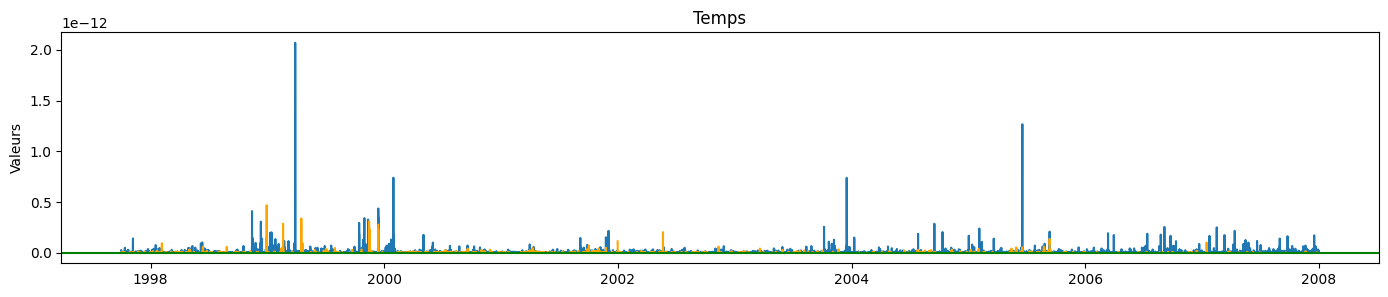

In [61]:
display_timeline(var_s, labels_train)

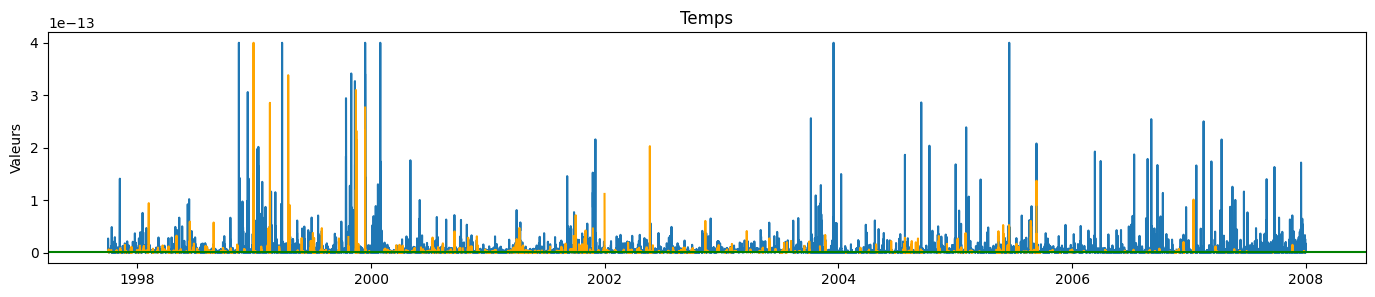

In [62]:
threshold_var_s = var_s.map(lambda x: min(x, 0.4 * 1e-12))
display_timeline(threshold_var_s, labels_train)

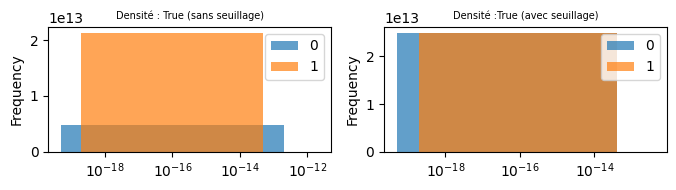

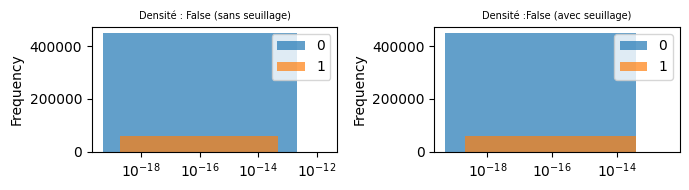

In [63]:
thresh_df =  threshold_var_s.to_frame()
thresh_df['label'] = df['label'].copy()

show_densities(df[[var_name, 'label']], thresh_df)

- On dirait que ce sont surtout dans le cas calme que les valeurs divergent..

Un écart de 100 (tendance vers les petites valeurs) lorsqu'une tempête se produit)

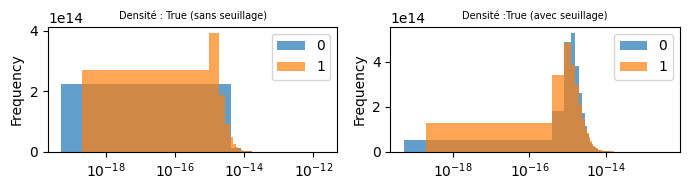

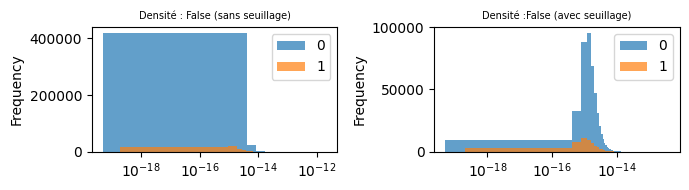

In [64]:
for density in [True, False]:
    _, ax = plt.subplots(ncols=2, figsize=(7, 2))
    ax[0].set_title("Densité : " + str(density) + " (sans seuillage)", fontsize=7)
    ax[1].set_title("Densité :" + str(density)+ " (avec seuillage)", fontsize=7)

    df[[var_name, 'label']].groupby(['label'])[var_name].plot(kind='hist', alpha=0.7, ax=ax[0], bins=500, legend=True, density=density, logx=True, )
    thresh_df.groupby(['label'])[var_name].plot(kind='hist', alpha=0.7, ax=ax[1], bins=1000, legend=True, density=density, logx=True, )
    plt.tight_layout()

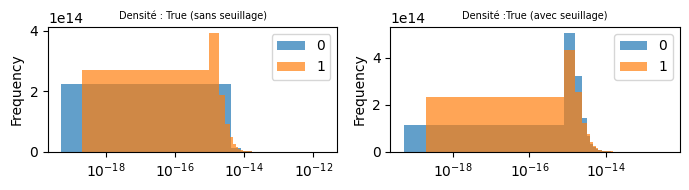

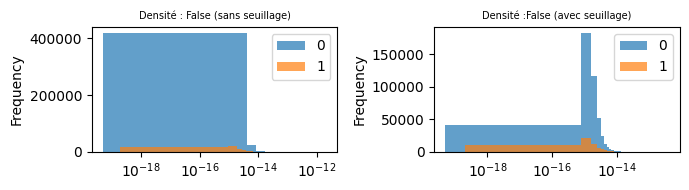

In [65]:
for density in [True, False]:
    _, ax = plt.subplots(ncols=2, figsize=(7, 2))
    ax[0].set_title("Densité : " + str(density) + " (sans seuillage)", fontsize=7)
    ax[1].set_title("Densité :" + str(density)+ " (avec seuillage)", fontsize=7)

    df[[var_name, 'label']].groupby(['label'])[var_name].plot(kind='hist', bins=500, alpha=0.7, ax=ax[0], legend=True, density=density, logx=True, )
    thresh_df.groupby(['label'])[var_name].plot(kind='hist', alpha=0.7,  bins=500, ax=ax[1], legend=True, density=density, logx=True,)
    plt.tight_layout()

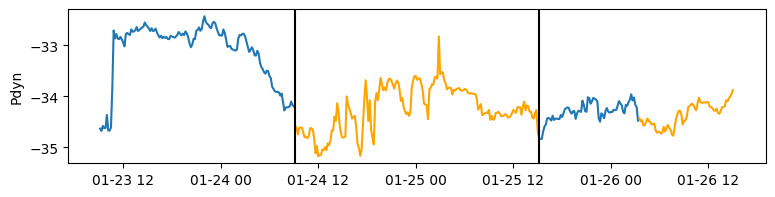

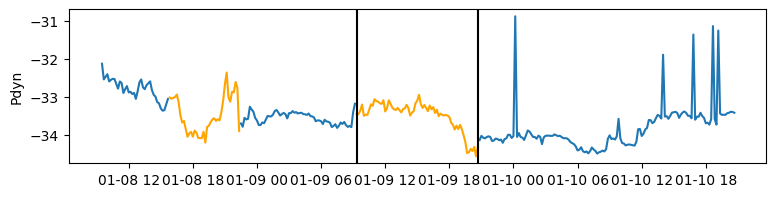

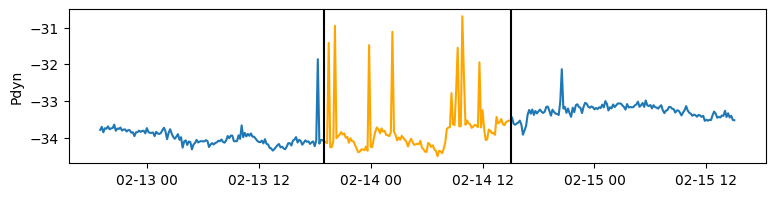

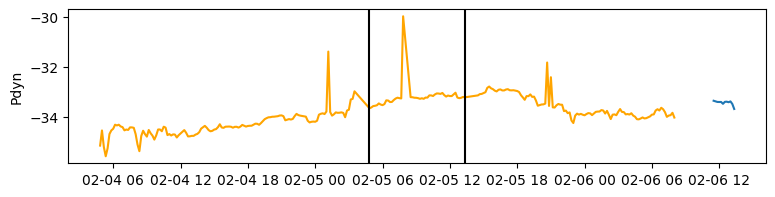

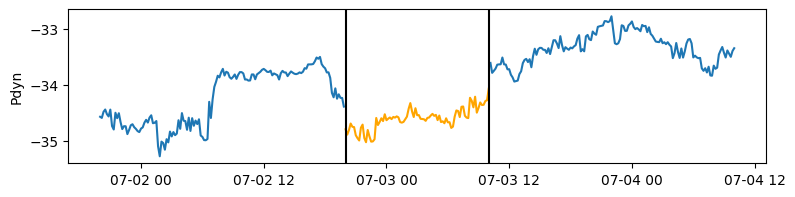

In [71]:
multiple_plots(
    threshold_var_s.map(np.log).to_frame(),
    labels_train,
    n_events=5,
    events=events,
    delta=24,
    figsize=(9, 2),
    random_state=2)

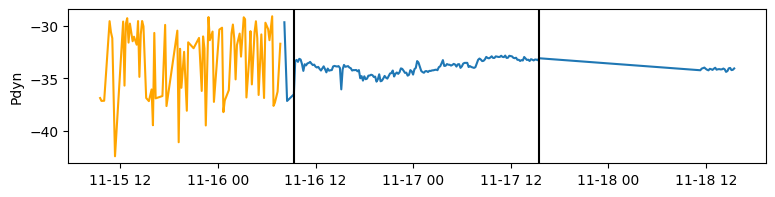

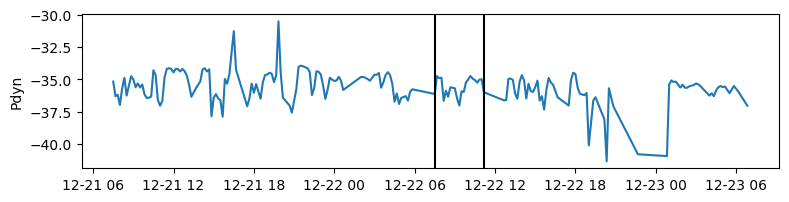

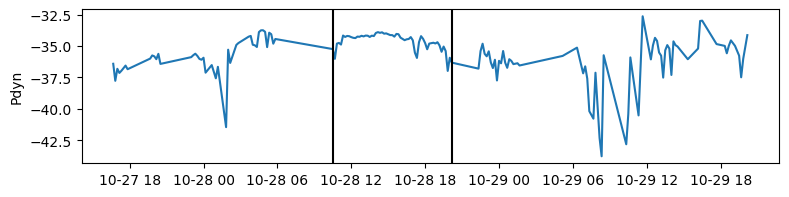

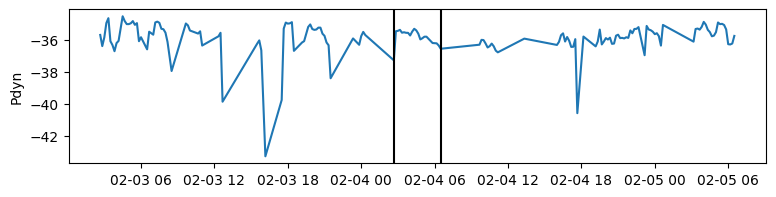

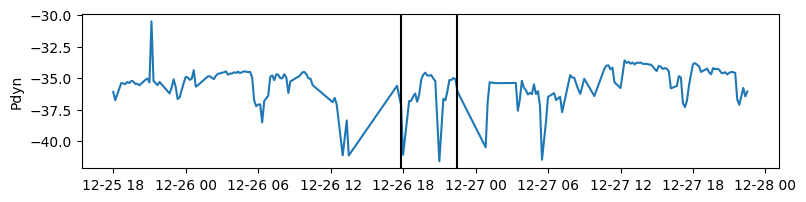

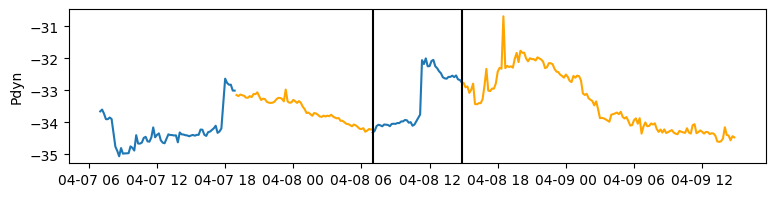

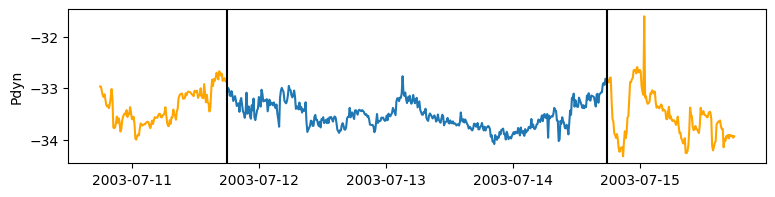

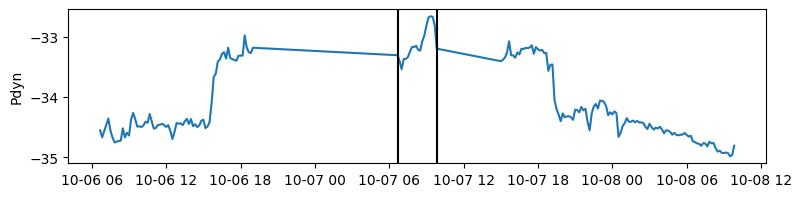

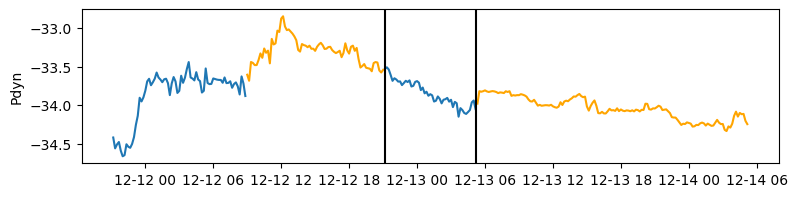

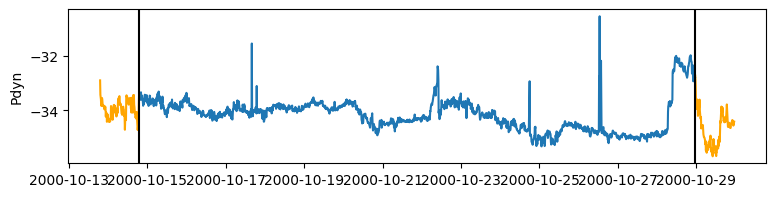

In [72]:
multiple_plots(
    threshold_var_s.map(np.log).to_frame(),
    labels_train,
    n_events=10,
    events=no_events,
    delta=24,
    figsize=(9, 2),
    random_state=2)